**1. Import Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Set default setting of seaborn
sns.set()

**2. Read the Data**

In [2]:
#read the data
raw_data = pd.read_excel(r"C:\zubeda\PGA02_Zubu\Machine Learning Models\K-MeansClustering\Dataset\cust_data.xlsx", index_col=0)

#print the first 5 rows
raw_data.head()

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,M,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2,F,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,M,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,F,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,NaN,10,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


**3. Understand and Prepare the Data**

**3.1 Data Types and Dimensions**

In [3]:
#check the data types for variables
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  27276 non-null  object
 1   Orders                  30000 non-null  int64 
 2   Jordan                  30000 non-null  int64 
 3   Gatorade                30000 non-null  int64 
 4   Samsung                 30000 non-null  int64 
 5   Asus                    30000 non-null  int64 
 6   Udis                    30000 non-null  int64 
 7   Mondelez International  30000 non-null  int64 
 8   Wrangler                30000 non-null  int64 
 9   Vans                    30000 non-null  int64 
 10  Fila                    30000 non-null  int64 
 11  Brooks                  30000 non-null  int64 
 12  H&M                     30000 non-null  int64 
 13  Dairy Queen             30000 non-null  int64 
 14  Fendi                   30000 non-null  int64 
 15  He

In [4]:
#get the shape
raw_data.shape

(30000, 37)

**3.2 Distribution of Variables**

1. Distribution of orders placed by customers

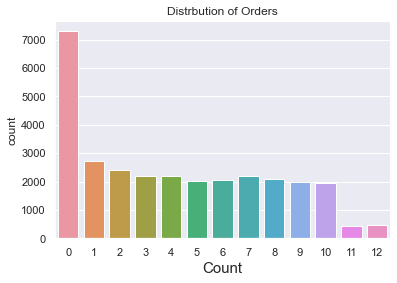

In [5]:
#use 'countplot' to plot barplot for orders
sns.countplot(data=raw_data, x='Orders')

#set the axes and plot labels
#set the font size using 'fontsize'
plt.title("Distrbution of Orders")
plt.xlabel("No. of Orders", fontsize=15)
plt.xlabel("Count", fontsize=15)

plt.show()

2. Distribution of gender of customers

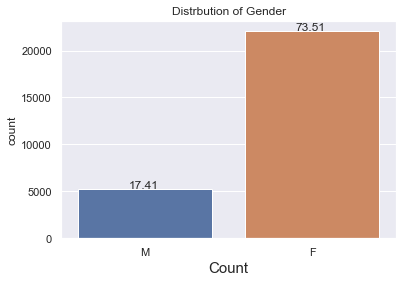

In [6]:
#use 'countplot' to gender-wise calculate the no. of customers
sns.countplot(data=raw_data, x="Gender")

#set the axes and plot labels
#set the font size using 'fontsize'
plt.title("Distrbution of Gender")
plt.xlabel("Gender", fontsize=15)
plt.xlabel("Count", fontsize=15)

#use below code to print the values in the graph
#'x' and 'y' gives the position of the text
#'s' is the text
plt.text(x=-0.1, y=raw_data.Gender.value_counts()[1] + 20, s=str( round( (raw_data.Gender.value_counts()[1]) * 100/len(raw_data.Gender), 2 ) ))
plt.text(x=0.9, y=raw_data.Gender.value_counts()[0] + 20, s=str( round( (raw_data.Gender.value_counts()[0]) * 100/len(raw_data.Gender), 2 ) ))
plt.show()

**3.3 Summary Statistics**

1. Summary for numerical variables

In [7]:
#data frame with numerical features
raw_data.describe()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,0.094267,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,0.531592,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,15.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


2. For categorical variables use describe(include=object)

In [8]:
#summary of categorical variables
raw_data.describe(include=object)

#Note: If we pass 'include=object' to the describe() function it returns descriptive statistics for categorical varibles

,Gender
count,27276
unique,2
top,F
freq,22054


**3.4 Missing Data Treatment**

In [9]:
#sorting variables based on null values
#'ascending=False' sorts values in descending order
Total = raw_data.isnull().sum().sort_values(ascending=False)

#percentage of missing values
Percent = (raw_data.isnull().sum()/raw_data.isnull().count() * 100).sort_values(ascending=False)

#create a dataframe using 'concat' function
#'keys' is the list of column names
#'axis=1' concats along the columns
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Gender,2724,9.08
Asics,0,0.00
Hewlett Packard,0,0.00
Fendi,0,0.00
Dairy Queen,0,0.00
H&M,0,0.00
Brooks,0,0.00
Fila,0,0.00
Vans,0,0.00
Wrangler,0,0.00


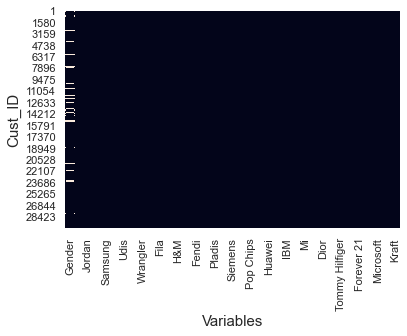

In [11]:
#plot heatmap to check null values
#'cbar=False' does not show the color axis
sns.heatmap(raw_data.isnull(), cbar=False)

#set the axes and plot the labels
#set the font size using 'fontsize'
plt.xlabel('Variables', fontsize=15)
plt.ylabel('Cust_ID', fontsize=15)

plt.show()

In [12]:
#replacing missing values in 'Gender'
#create dummies against 'Gender'
data = pd.get_dummies(raw_data, columns=["Gender"])

#head() to display top 5 rows
data.head()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,7,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,10,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,1,0,0


In [13]:
#check the dimension after dummy encoding
data.shape

(30000, 38)

In [14]:
#recheck the null values
data.isnull().sum()

Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft                 0
Jiffy mix                 0
Kraft               

**3.5 Visualization**

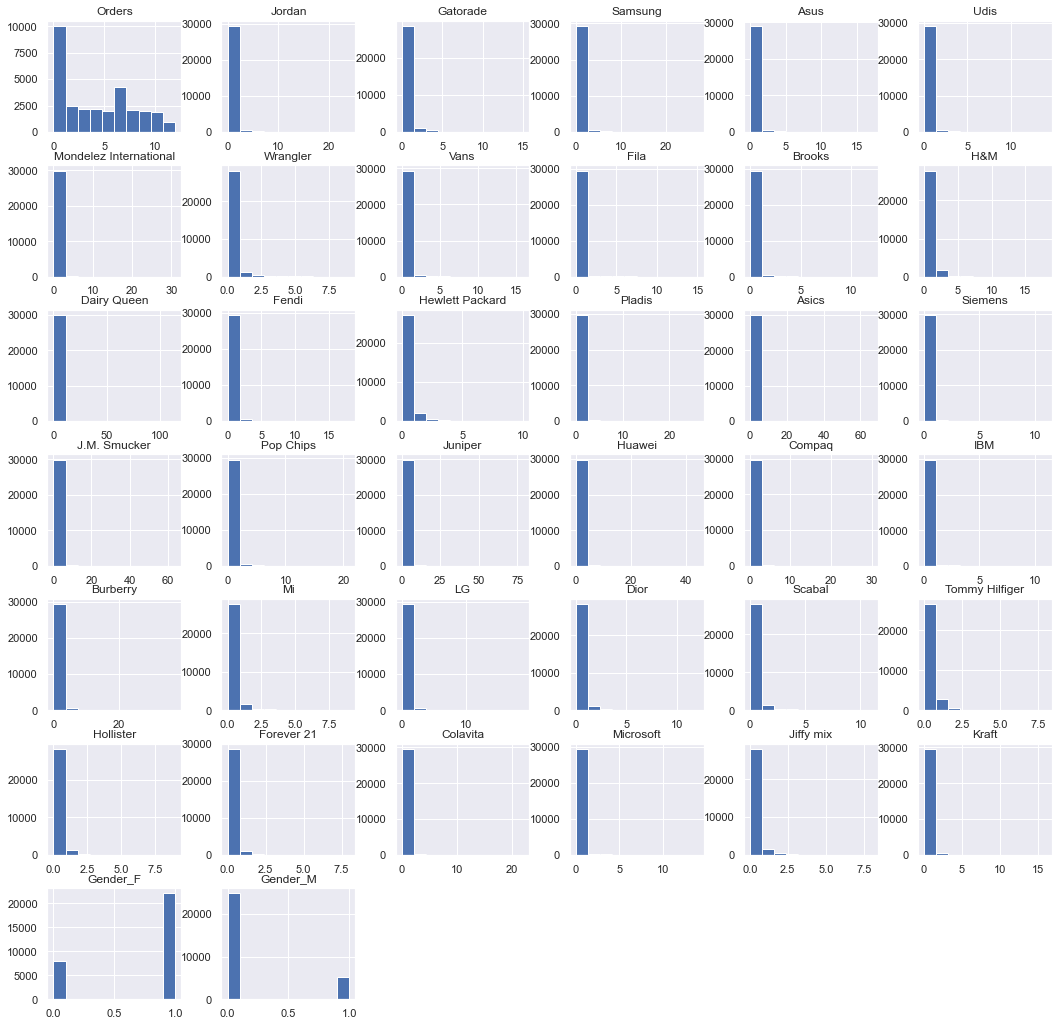

In [15]:
fig = data.hist(figsize=(18, 18))
plt.show()

**4. K-Means Clustering**

**4.1 Prepare the Data**

In [18]:
#features contain only the brand names
features = data.drop(['Orders', 'Gender_F', 'Gender_M'], axis=1)

#head() to display top 5 rows
features.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [19]:
#Scale the Data
from sklearn.preprocessing import StandardScaler
#instantiate and fit 'StandardScaler' function
scale = StandardScaler().fit(features)

#scale the 'features' data
features = scale.transform(features)

In [21]:
#create a dataframe of the scaled features
features_scaled = pd.DataFrame(features, columns=data.columns[1:36])

#head() to display top 5 rows
features_scaled.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,3.446412,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
1,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,1.019864,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
2,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,1.978708,-0.220486,-0.182775
3,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
4,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,2.149024,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,2.284083,2.395151


**4.2 Build a Model with Multiple K**

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#create a list for different values of K
n_clusters = [4, 5, 6, 7, 8]

# use 'for' loop to build the clusters
# 'random_state' returns the same sample each time you run the code  
# fit and predict on the scaled data
# 'silhouette_score' function computes the silhouette score for each K
for K in n_clusters:
    cluster = KMeans(n_clusters=K, random_state=10)
    predict = cluster.fit_predict(features_scaled)
    
    score = silhouette_score(features_scaled, predict, random_state=10)
    print("For n_clusters={}, silhoutte score is {}".format(K, score))

#Choose K with highest score

For n_clusters=4, silhoutte score is 0.28882936660558056
For n_clusters=5, silhoutte score is 0.27345077326493045
For n_clusters=6, silhoutte score is 0.21945733520641614
For n_clusters=7, silhoutte score is 0.20381188273552986
For n_clusters=8, silhoutte score is 0.19969011593446037


In [24]:
#building a K-Means model for K=4
model = KMeans(n_clusters=4, random_state=10)

#fit the model
model.fit(features_scaled)

KMeans(n_clusters=4, random_state=10)

**5. Retreive the Clusters**